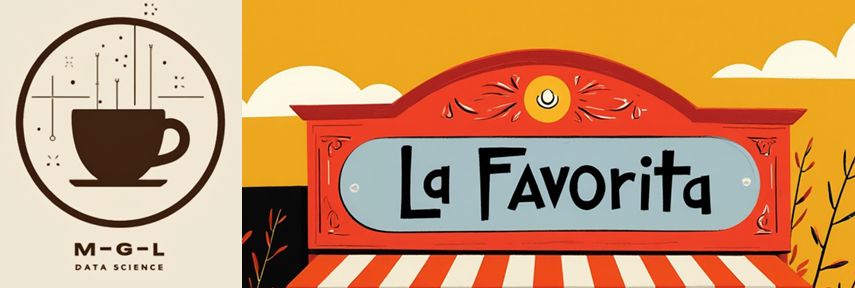

#               **LA FAVORITA STORES SALES:**

# *Part 1: Data Loading and Scraping Module*

The Following Notebook and Data Analysis / Model Creation Project is Based on Kaggle Open Challenge : ["Store Sales"](https://www.kaggle.com/c/store-sales-time-series-forecasting/overview)

This Module is the Data Loading and Webscrapping break down of the full notebook avaiable of [GitHub](https://github.com/Martin-G-L/Sales-Forecasting). It showcase two forms of loading the data, through Kaggle's API and by loading files uploaded on Google Drive.  

# Case Presented:

Here is the Challenge Description:   

**Description**

**Goal of the Competition**
In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales


**Context**

Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

**Potential Impact**

If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.

**Dataset Description**
<br>
<br>
The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.
<br>
<br>

**File Descriptions and Data Field Information** (as per original descriptions)
<br>
<br>
**train.csv**
<br>

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
<br>
<br>

**test.csv**
<br>

The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.
sample_submission.csv
A sample submission file in the correct format.
stores.csv
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.
<br>
<br>

**oil.csv**
<br>

Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)
holidays_events.csv
Holidays and Events, with metadata
NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

# Personal Considerations

This project was elaborate in Google Colab as to facilitate the development in more than one location using Google Drive for files managment for simplicity. By making small ajustments in "Data Analysis: Loading Data" section, it is simple to run in a local environment.

# Loading Data through Google Drive

To load data through Google Drive, first go to the [Kaggle Chalenge Data Url](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data)
and download the files, afterwards upload them in a google drive folder of your choice:
<br>
<br>

*   train.csv
*   test.csv
*   holdiday.csv
*   oil.csv
*   transactions.csv *
<br>
<br>

'*' Note: The transactions file, although used for learning purposes in regards to data wrangling, is not used in the final model creation setting.



Importing Required Library

In [3]:
from google.colab import drive                          #Mounting Drive Into Notebook for use
import pandas as pd                                     #Dataframe library to cast the read files

Mount the Drive and enter the working directory containing the files manualy obtained.

In [2]:
drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS/PYDATASCI/Store Sales/ #Entering correct working directory

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

Mounted at /content/drive
/content
/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales


Loading the files using read_csv function from pandas library
<br>

**your_dataframe_name= pd.read_csv("file.csv")**

In [4]:
#Series of Features with Sales Data for Training called here df0 as it will be the base in which we will work
df0 = pd.read_csv('train.csv')

#Stores Information (Type,Cluster,Location)
dfStores=pd.read_csv('stores.csv')

#Oil Prices Data during the period spam of the data contained on the sets
dfOil=pd.read_csv('oil.csv')

#Local Holidays Events in Equador Table
dfHolidays=pd.read_csv('holidays_events.csv')

#Transaction Volumes Table
dfTransactions=pd.read_csv('transactions.csv')

#Series of Features with Sales Data for Training
dfTest=pd.read_csv('test.csv')

Easy as that ! The files have already been loaded. This method in adequate your working with a small amount of files with a medium to small size. For larger and more complex data sets it is recomended to perform the fetching through API's if avaiable in order to not saturate your drives memory or perform a high amount of manual data downloading and uploading.

# Loading Data through Kaggles API:

###1) Install Kaggle's API

In [1]:
!pip install kaggle

###2) Enable Kaggle API

If you do not yet posses a Kaggle account, one will be required. These can be made freely in the following [Link](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F). Aftewards follow the following steps:

* Go to Kaggle.
* Click on your profile picture (top right) > Account.
* Go to Settings
* Scroll down to API > Click Create New API Token.
* A file named kaggle.json will be downloaded.

###3) Upload kaggle.json to Colab

In [2]:
#Import Library required for colab's upload's
from google.colab import files
#Perform the upload.
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"martinlartigue","key":"8423303049b9775768bca2ecac156d2d"}'}

###4) Set Up Kaggle API Permissions

In [3]:
# Library for interacting with the operating system
import os
# Library for  high-level file operations such as copying, moving, and deleting files or directories.
import shutil

# Create the .kaggle folder if it doesn't exist (the folder must be as such)
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct location
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

print("Kaggle API is now set up!")


Kaggle API is now set up!


###5) Download the Dataset

Listing all filles avaiable of Stores Sales Time Forecasting Competition

In [4]:
!kaggle competitions files -c store-sales-time-series-forecasting

name                    size  creationDate         
---------------------  -----  -------------------  
holidays_events.csv     22KB  2021-11-22 20:13:10  
sample_submission.csv  334KB  2021-11-22 20:13:10  
oil.csv                 20KB  2021-11-22 20:13:10  
test.csv               998KB  2021-11-22 20:13:10  
train.csv              116MB  2021-11-22 20:13:10  
stores.csv               1KB  2021-11-22 20:13:10  
transactions.csv         1MB  2021-11-22 20:13:10  


If you want to download all files run the following:

In [ ]:
!kaggle competitions download -c store-sales-time-series-forecasting

Otherwise download only th files you intent to use:

In [5]:
!kaggle competitions download -c store-sales-time-series-forecasting --file "train.csv"
!kaggle competitions download -c store-sales-time-series-forecasting --file "test.csv"
!kaggle competitions download -c store-sales-time-series-forecasting --file "sample_submission.csv"
!kaggle competitions download -c store-sales-time-series-forecasting --file "stores.csv"
!kaggle competitions download -c store-sales-time-series-forecasting --file "transactions.csv"
!kaggle competitions download -c store-sales-time-series-forecasting --file "oil.csv"
!kaggle competitions download -c store-sales-time-series-forecasting --file "holidays_events.csv"

print("Kaggle Files Have been downloaded!")

 82% 17.0M/20.8M [00:01<00:00, 27.5MB/s]
100% 20.8M/20.8M [00:01<00:00, 19.5MB/s]
100% 998k/998k [00:00<00:00, 1.73MB/s]
100% 998k/998k [00:00<00:00, 1.73MB/s]
100% 334k/334k [00:00<00:00, 803kB/s]
100% 334k/334k [00:00<00:00, 803kB/s]
  0% 0.00/1.35k [00:00<?, ?B/s]
100% 1.35k/1.35k [00:00<00:00, 3.24MB/s]
100% 360k/360k [00:00<00:00, 957kB/s]
100% 360k/360k [00:00<00:00, 956kB/s]
  0% 0.00/20.1k [00:00<?, ?B/s]
100% 20.1k/20.1k [00:00<00:00, 36.2MB/s]
  0% 0.00/21.8k [00:00<?, ?B/s]
100% 21.8k/21.8k [00:00<00:00, 26.9MB/s]
Kaggle Files Have been downloaded!


Bigger Files Might Zip so if needed run the following to extract them :

In [6]:
import zipfile
import os

for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(".")
        print(f"Extracted: {file}")

Extracted: train.csv.zip
Extracted: transactions.csv.zip


###6) Verify Upload and Turn it into Dataframe:

Verify

In [7]:
print(os.listdir())

['.config', 'holidays_events.csv', 'transactions.csv', 'sample_submission.csv', 'train.csv', 'stores.csv', 'train.csv.zip', 'transactions.csv.zip', 'test.csv', 'oil.csv', 'sample_data']


Cast into Data frame

In [9]:
import pandas as pd

# Define the folder containing the CSV files
#folder_path = "your_folder_path_here"

# List all CSV files in the directory
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

# Dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame
for file in csv_files:
    file_path = os.path.join(file)
    df_name = file.replace(".csv", "")  # Name the DataFrame based on the file name
    dataframes[df_name] = pd.read_csv(file_path)

# Display available DataFrames
print(f"Loaded {len(dataframes)} CSV files as DataFrames:")
print(list(dataframes.keys()))

Loaded 7 CSV files as DataFrames:
['holidays_events', 'transactions', 'sample_submission', 'train', 'stores', 'test', 'oil']


Test if Everything went Accordinly:

In [11]:
dataframes['train'].head()  # If 'train.csv' was in the folder, it’s now a DataFrame.

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


Ansd there it is, you can rename the data frames is desired!
<br>
By using the Kaggle API in Google Colab, the CSV files are downloaded into the working directory of your Colab environment, which resets after the session ends.